In [29]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from scipy.misc.pilutil import Image
from skimage.filters import threshold_otsu,threshold_local
from scipy.misc import fromimage
from skimage import measure 

In [98]:
import scipy
image_color=fromimage(Image.open('./moon-birds.jpg'))
image_init = fromimage(Image.open('./moon-birds.jpg').convert("L"))
image = scipy.ndimage.filters.median_filter(image_init,size=9,
footprint=None,output=None,mode='reflect',
cval=0.0,origin=0)

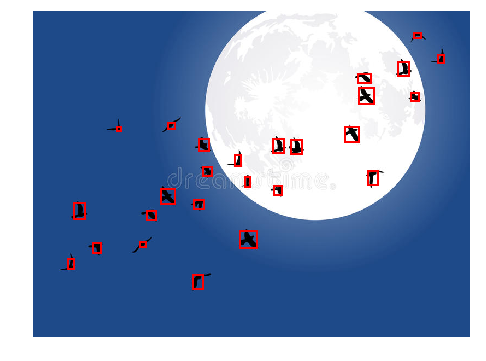

In [100]:
#image = fromimage(Image.open('./moon-birds.jpg').convert("L"))

thresh = threshold_local(image,block_size=31,offset=20)
bw = image > thresh

label_image = measure.label(bw, background=1)

fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(image_color)

for region in measure.regionprops(label_image):
    # draw rectangle
    minr, minc, maxr, maxc = region.bbox
    if (maxc - minc) >400:
        continue
        
    rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                              fill=False, edgecolor='red', linewidth=2)
    ax.add_patch(rect)

ax.set_axis_off()
plt.show()

In [89]:
threshold_local(image,block_size=31,offset=20)


array([[ 48.,  48.,  48., ...,  48.,  48.,  48.],
       [ 48.,  48.,  48., ...,  48.,  48.,  48.],
       [ 48.,  48.,  48., ...,  48.,  48.,  48.],
       ..., 
       [ 48.,  48.,  48., ...,  48.,  48.,  48.],
       [ 48.,  48.,  48., ...,  48.,  48.,  48.],
       [ 48.,  48.,  48., ...,  48.,  48.,  48.]])

In [91]:
help(threshold_local)

Help on function threshold_local in module skimage.filters.thresholding:

threshold_local(image, block_size, method='gaussian', offset=0, mode='reflect', param=None)
    Compute a threshold mask image based on local pixel neighborhood.
    
    Also known as adaptive or dynamic thresholding. The threshold value is
    the weighted mean for the local neighborhood of a pixel subtracted by a
    constant. Alternatively the threshold can be determined dynamically by a
    given function, using the 'generic' method.
    
    Parameters
    ----------
    image : (N, M) ndarray
        Input image.
    block_size : int
        Odd size of pixel neighborhood which is used to calculate the
        threshold value (e.g. 3, 5, 7, ..., 21, ...).
    method : {'generic', 'gaussian', 'mean', 'median'}, optional
        Method used to determine adaptive threshold for local neighbourhood in
        weighted mean image.
    
        * 'generic': use custom function (see `param` parameter)
        * 'g